# LSA

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,848 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

In [2]:
doc_ls = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 4

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(doc_ls)
svd = TruncatedSVD(n_components=n_topic, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [4]:
len(doc_ls)

12

In [5]:
U.shape

(12, 4)

In [6]:
Vt.shape

(4, 16)

In [7]:
tfidf.shape

(12, 16)

In [8]:
vocab = tfidf_vect.get_feature_names()
print(vocab)
n = 3
for i, topic in enumerate(Vt):
    print("Topic {}:".format(i), [ (vocab[i], topic[i].round(3)) for i in topic.argsort()[:-n-1:-1]])

['가츠동', '김치', '김치찌개', '된장', '된장찌개', '라면', '바나나', '볶음밥', '비빔밥', '사과', '소바', '스시', '짜장면', '짬뽕', '탕수육', '포도']
Topic 0: [('포도', 0.583), ('짜장면', 0.499), ('바나나', 0.33)]
Topic 1: [('짜장면', 0.44), ('짬뽕', 0.391), ('스시', 0.315)]
Topic 2: [('스시', 0.703), ('라면', 0.353), ('가츠동', 0.253)]
Topic 3: [('김치', 0.682), ('비빔밥', 0.373), ('김치찌개', 0.272)]


In [9]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors):
    def consine_similarity(a, b):
        return dot(a, b)/(norm(a)*norm(b))

    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))

    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[j, i] = consine_similarity(vectors[i], vectors[j]).round(4)

    return similarity_matrix

In [10]:
word_vectors = Vt.T
word_similarity_matrix = calc_similarity_matrix(word_vectors)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix, label):
    mask =np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rc('font', family='AppleGothic')
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label,
                     annot=True, fmt=".2f", annot_kws={"size":8},cmap="coolwarm")

<ipython-input-12-723d16bef75f>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask =np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
/Users/daydream/miniforge3/envs/nlp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/daydream/miniforge3/envs/nlp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


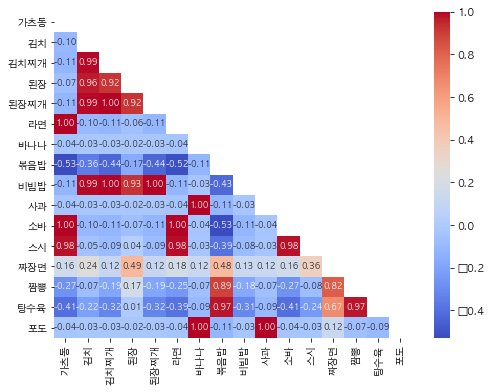

In [13]:
visualize_similarity(word_similarity_matrix, vocab)

In [14]:
U.shape

(12, 4)

<ipython-input-12-723d16bef75f>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask =np.triu(np.ones_like(similarity_matrix, dtype=np.bool))


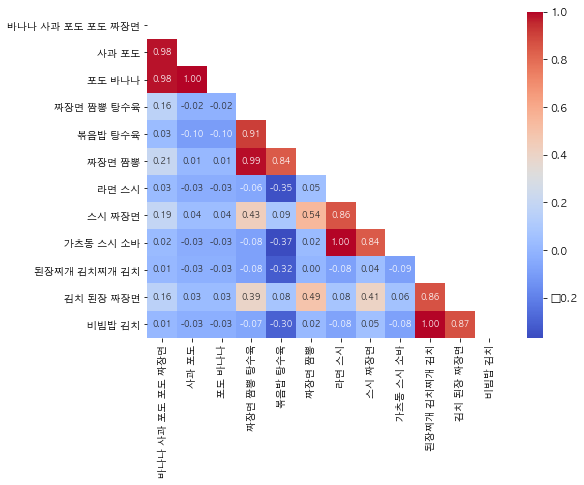

In [15]:
doc_similarity_matrix = calc_similarity_matrix(U)
visualize_similarity(doc_similarity_matrix, doc_ls)

In [16]:
from sklearn.manifold import TSNE

def visualize_vectors(vectors, labels):
    tsne = TSNE(n_components=2, n_iter=10000, perplexity=2)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(T[:,0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:,0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

/Users/daydream/miniforge3/envs/nlp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/daydream/miniforge3/envs/nlp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


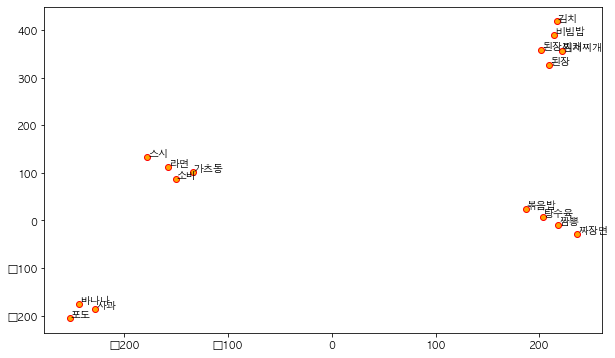

In [17]:
visualize_vectors(word_vectors, vocab)

# LDA

In [1]:
import random
import numpy as np
# import nltk
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import defaultdict

topic_indices = [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]

doc_ls = ["Cute kitty", 
          "Eat rice or caek", 
          "Kitty and hamster",
          "Eat bread", 
          "Rice, bread and cake", 
          "Cute hamster eats bread and cake"
         ]



In [2]:

class LDA:

    def __init__(self, docs, topic_num, alpha=0.1, beta=0.001):
        self.alpha = alpha
        self.beta = beta
        self.k = topic_num
        self.docs = docs

    def randomly_analysis_topic (self):
        dic = defaultdict()
        t2i = defaultdict(lambda: len(t2i))
        i2t = defaultdict()

        porter = PorterStemmer()
        stopword = stopwords.words('english')
        stopword.append(',')
        index = 0
        for d, tokens in enumerate([word_tokenize(doc) for doc in self.docs]):
            for w, token in enumerate([porter.stem(token.lower()) for token in tokens if token not in stopword]):
                i2t[t2i[token]]= token
                dic[(d, t2i[token], w)] = topic_indices[index]
                # dic[(d, t2i[token], w)] = random.randint(0, self.k -1)
                index += 1

        return dic, t2i, i2t

    def count_doc_topic(self, term_topic, t2i):
        docs = np.zeros((self.k, len(self.docs)))
        terms = np.zeros((self.k, len(t2i)))

        docs.fill(self.alpha)
        terms.fill(self.beta)

        for (d, n, w) in term_topic.keys():
            topic = term_topic[(d, n, w)]
            docs[topic, d] += 1
            terms[topic, n] += 1

        print(docs)
        print(terms)

        return docs, terms



    def iterate_assign_topic(self, term_topic, docs, terms, i2t):
        prev = {}

        while prev != term_topic:
            for (d, n, w) in term_topic:
                topic = [0, 0]

                docs[term_topic[(d, n, w)], d] -= 1
                terms[term_topic[(d, n, w)], n] -= 1

                prev = term_topic

                for t in range(self.k):
                    p_t_d = docs[t, d] /docs[:, d].sum()
                    p_w_t = terms[t, n] / terms[t, :].sum()
                    prob = p_t_d * p_w_t

                    if topic[1] < prob:
                        topic = [t, prob]


                term_topic[(d, n, w)] = topic[0]
                docs[topic[0], d] += 1
                terms[topic[0], n] += 1

        return terms


    def topic_modeling(self, count=3):
        term_topic, t2i, i2t = self.randomly_analysis_topic()
        docs, terms  = self.count_doc_topic(term_topic, t2i)
        terms = self.iterate_assign_topic(term_topic, docs, terms, i2t)

        score = terms / terms.sum(axis=1, keepdims=True)

        for i in range(self.k):
            print(f"topic {i} =>", end=" ")
            sorted_index = np.flip(np.argsort(score[i]), 0)[:count]
            for j in sorted_index:
                print("({}, {})".format(i2t[j], score[i, j].round(3)), end=" ")

            print("")


In [3]:
lda = LDA(doc_ls, 2)
lda.topic_modeling(3)

[[1.1 2.1 0.1 2.1 2.1 2.1]
 [1.1 1.1 2.1 0.1 1.1 3.1]]
[[1.001e+00 1.000e-03 2.001e+00 1.001e+00 1.001e+00 1.000e-03 2.001e+00
  2.001e+00]
 [1.001e+00 2.001e+00 1.001e+00 1.001e+00 1.000e-03 2.001e+00 1.001e+00
  1.000e-03]]
topic 0 => (bread, 0.273) (eat, 0.273) (cake, 0.182) 
topic 1 => (hamster, 0.333) (kitti, 0.333) (cute, 0.333) 


In [4]:
from sklearn.datasets import fetch_20newsgroups
datasets = fetch_20newsgroups(shuffle=True, random_state=42, remove=('header','footer','quotes'))

In [11]:
!pip install spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
import pandas as pd

news_df = pd.DataFrame({'document':datasets.data})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: " ".)